In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
train_path=r'C:\Post Graduate Course in Data Analytics\KAGGLE DATASETS, SCRIPTS & PPTS\IMAGE FOLDER FOR CNN\seg_train'
test_path=r'C:\Post Graduate Course in Data Analytics\KAGGLE DATASETS, SCRIPTS & PPTS\IMAGE FOLDER FOR CNN\seg_test'

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_set=train_datagen.flow_from_directory(train_path,target_size=(64,64),batch_size=100,class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [6]:
test_set=test_datagen.flow_from_directory(test_path,target_size=(64,64),batch_size=100,class_mode='categorical')

Found 3000 images belonging to 6 classes.


C:\Users\soume\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


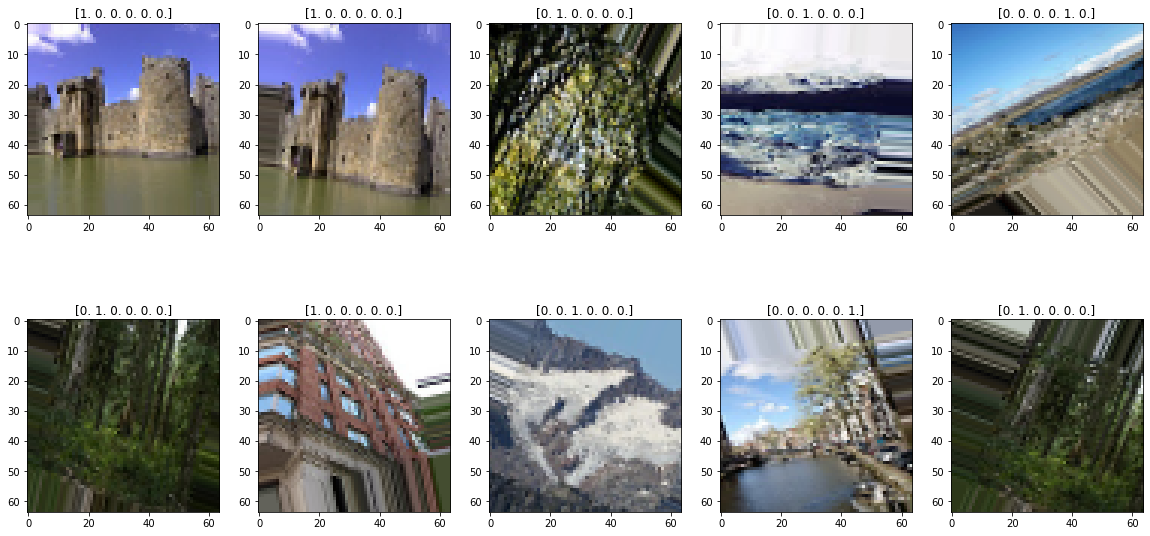

In [8]:
indices=[np.random.randint(32) for i in range(10)]

plt.figure(figsize=(20,10))
for i in enumerate(indices):
    plt.subplot(2,5,i[0]+1)
    plt.imshow(train_set[0][0][i[1]])
    plt.title(train_set[0][1][i[1]])
plt.show()

In [10]:
values=list(train_set.class_indices.values())
keys=list(train_set.class_indices.keys())

In [31]:
dic={}
dic[values[0]]=keys[0]
dic[values[1]]=keys[1]
dic[values[2]]=keys[2]
dic[values[3]]=keys[3]
dic[values[4]]=keys[4]
dic[values[5]]=keys[5]

In [32]:
dic

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [41]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics='accuracy')

In [44]:
history=model.fit_generator(train_set,steps_per_epoch=100,epochs=12,validation_data=test_set)

Epoch 1/12
100/100 [==============================] - 171s 2s/step - loss: 1.4059 - accuracy: 0.4481 - val_loss: 1.2511 - val_accuracy: 0.5063
Epoch 2/12
100/100 [==============================] - 147s 1s/step - loss: 1.1212 - accuracy: 0.5702 - val_loss: 1.2040 - val_accuracy: 0.5603
Epoch 3/12
100/100 [==============================] - 89s 880ms/step - loss: 1.0296 - accuracy: 0.6052 - val_loss: 0.9370 - val_accuracy: 0.6593
Epoch 4/12
100/100 [==============================] - 127s 1s/step - loss: 0.9691 - accuracy: 0.6285 - val_loss: 1.1119 - val_accuracy: 0.6030
Epoch 5/12
100/100 [==============================] - 141s 1s/step - loss: 0.9482 - accuracy: 0.6435 - val_loss: 0.7842 - val_accuracy: 0.7170
Epoch 6/12
100/100 [==============================] - 83s 828ms/step - loss: 0.9023 - accuracy: 0.6657 - val_loss: 0.7379 - val_accuracy: 0.7337
Epoch 7/12
100/100 [==============================] - 72s 720ms/step - loss: 0.8807 - accuracy: 0.6674 - val_loss: 0.7293 - val_accuracy: 

In [47]:
predict_path=r'C:\Post Graduate Course in Data Analytics\KAGGLE DATASETS, SCRIPTS & PPTS\IMAGE FOLDER FOR CNN\seg_pred'
predict_datagen=ImageDataGenerator(rescale=1./255)

In [49]:
predict_set=predict_datagen.flow_from_directory(predict_path,target_size=(64,64),shuffle=True,batch_size=7301)

Found 7301 images belonging to 1 classes.


In [50]:
index=38
tar=np.argmax(model.predict(predict_set[0][0][index].reshape(-1,64,64,3)))

In [52]:
for i in dic:
    if tar==i:
        cls=dic[i]

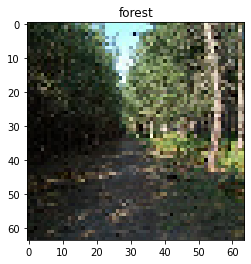

In [53]:
plt.imshow(predict_set[0][0][index])
plt.title(cls)
plt.show()